In [278]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [298]:
# Importing the training set
dataset_train = pd.read_csv('ModuleDataset_processed.csv')
print(dataset_train.columns)
test_num=23
training_set = dataset_train.iloc[:-test_num,2:3].values
dataset_train.shape,training_set.shape

Index(['year', 'month', 'rainfall', 'Flood'], dtype='object')


((863, 4), (840, 1))

In [299]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [300]:
# Creating a data structure with timesteps and t+1 output
X_train = []
y_train = []
timestep=12

In [301]:
for i in range(timestep, training_set.shape[0]):
    X_train.append(training_set_scaled[i-timestep:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape,y_train.shape)
# print(X_train)
# print(y_train)

(828, 12) (828,)


In [302]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(828, 12, 1)

In [284]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 3, input_shape = (None, 1),return_sequences=True)) # if >1 lstm layer put return_sequences=True here

# Adding a second LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a third LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# # Adding a fourth LSTM layer
regressor.add(LSTM(units = 3)) #last lstm layer return_sequences=False for Next dense layer


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [285]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 200, batch_size = 12)

Epoch 1/200
828/828 [==============================] - 13s 16ms/step - loss: 0.0182
Epoch 2/200
828/828 [==============================] - 4s 4ms/step - loss: 0.0168
Epoch 3/200
828/828 [==============================] - 3s 4ms/step - loss: 0.0167
Epoch 4/200
828/828 [==============================] - 3s 4ms/step - loss: 0.0163
Epoch 5/200
828/828 [==============================] - 4s 5ms/step - loss: 0.0159
Epoch 6/200
828/828 [==============================] - 3s 4ms/step - loss: 0.0152
Epoch 7/200
828/828 [==============================] - 5s 6ms/step - loss: 0.0141
Epoch 8/200
828/828 [==============================] - 3s 4ms/step - loss: 0.0127
Epoch 9/200
828/828 [==============================] - 5s 6ms/step - loss: 0.0119
Epoch 10/200
828/828 [==============================] - 3s 4ms/step - loss: 0.0117
Epoch 11/200
828/828 [==============================] - 5s 6ms/step - loss: 0.0114
Epoch 12/200
828/828 [==============================] - 3s 4ms/step - loss: 0.0113
Epoch 13/20

In [303]:
dataset_test = dataset_train.iloc[-test_num:,:]
test_set = dataset_test.iloc[:,2:3].values
real_rainfall = np.concatenate((dataset_train.iloc[:-test_num,2:3].values,test_set),axis = 0)
print(real_rainfall.shape)
scaled_real_rainfall = sc.fit_transform(real_rainfall)

inputs = []
for i in range(len(dataset_train)-test_num, len(dataset_train)+1):
    inputs.append(scaled_real_rainfall[i-timestep:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predicted_rainfall = regressor.predict(inputs)
predicted_rainfall = sc.inverse_transform(predicted_rainfall)
print(predicted_rainfall.shape)

(863, 1)
(24, 1)


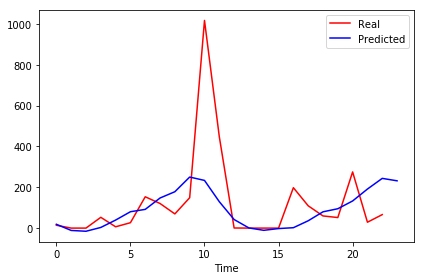

<Figure size 432x288 with 0 Axes>

In [304]:
# Visualising the results
plt.plot(real_rainfall[863-test_num:], color = 'red', label = 'Real')
plt.plot(predicted_rainfall, color = 'blue', label = 'Predicted')
# plt.title('Rainfall Prediction')
plt.xlabel('Time')
# plt.ylabel('Rainfall')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Output21.png')

In [305]:
test_num=len(dataset_train)-24
dataset_test = dataset_train.iloc[-test_num:,:]
test_set = dataset_test.iloc[:,2:3].values
real_rainfall = np.concatenate((dataset_train.iloc[:-test_num,2:3].values,test_set),axis = 0)
print(real_rainfall.shape)
scaled_real_rainfall = sc.fit_transform(real_rainfall)

inputs = []
for i in range(len(dataset_train)-test_num, len(dataset_train)+1):
    inputs.append(scaled_real_rainfall[i-timestep:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predicted_rainfall = regressor.predict(inputs)
predicted_rainfall = sc.inverse_transform(predicted_rainfall)
print(predicted_rainfall.shape)

(863, 1)
(840, 1)


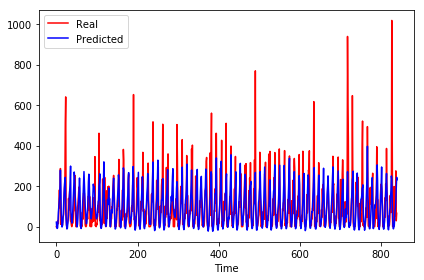

<Figure size 432x288 with 0 Axes>

In [306]:
# Visualising the results
plt.plot(real_rainfall[len(dataset_train)-test_num:], color = 'red', label = 'Real')
plt.plot(predicted_rainfall, color = 'blue', label = 'Predicted')
# plt.title('Rainfall Prediction')
plt.xlabel('Time')
# plt.ylabel('Rainfall')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Output22.png')